# Identifying the Position of the Order No. 104

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import dfitspy as dft
from astropy.io import fits
from scipy.optimize import curve_fit as cft
import os
import utils as utl

First let's look how the fits file look like. Then we want to know the position of the 104th order; to do that we want to take the chunk of the data around 725th and 775th rows and plot it too.

Shape of the fits file:  (2148, 4096)
Shape of one row:  (4096,)


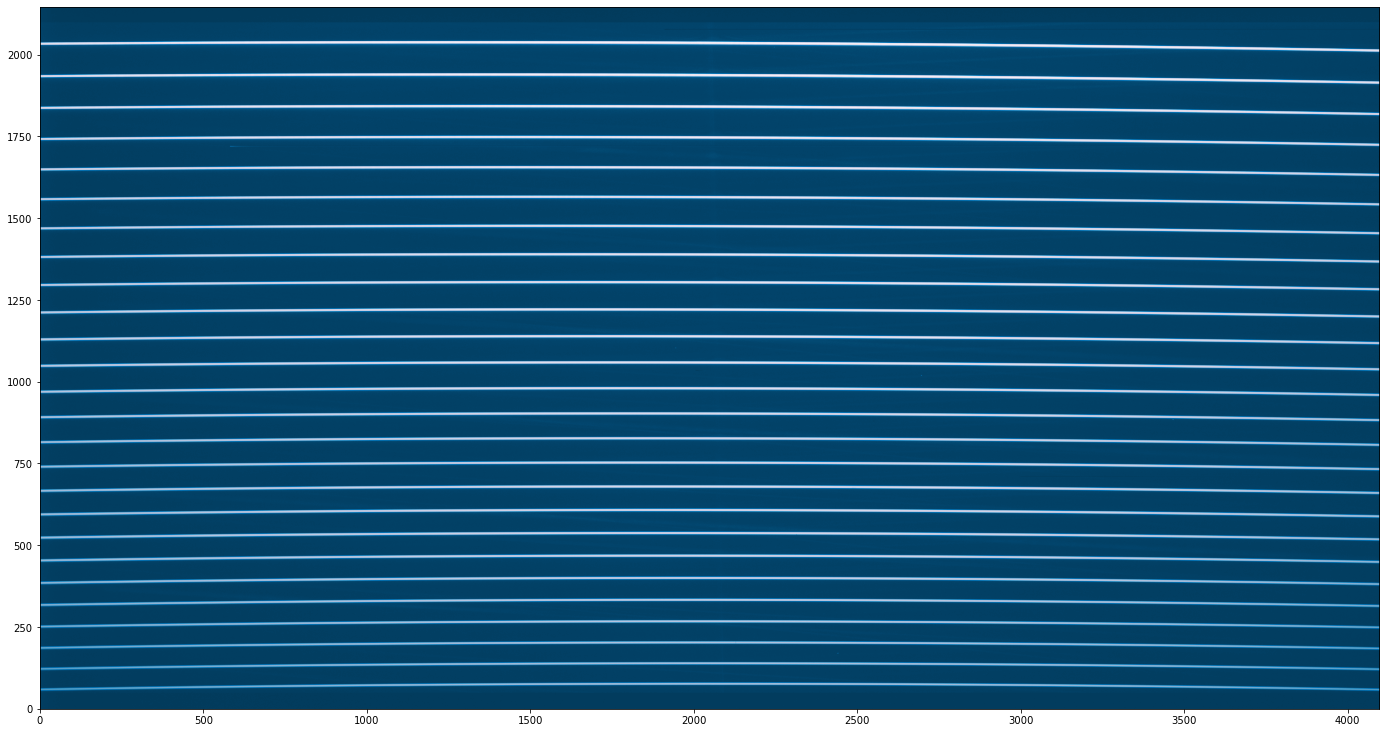

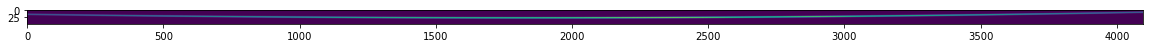

In [2]:
pth = os.getcwd() + '/Spectro-Module/raw/'

hdul = fits.open(pth + 'HARPS.2006-09-07T21:39:30.469.fits')
h11 = hdul[2].data
h22 = np.transpose(h11)

print('Shape of the fits file: ', h22.shape)
print('Shape of one row: ', h22[0].shape)

plt.figure(figsize=(16*1.5,9*1.5))
plt.imshow(h22, origin='lower', norm=clr.LogNorm(),cmap='PuBu_r')
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(h22[725:775])

data_order_104 = h22[725:775]

In the second figure above you can see only the 104th order which starts from 725th pixel row in the y-direction and end in 775th pixel row in the same direction. For the purpose of this study, we only need this order of the spectrum, thus, we extract this chunk of data from the original fits file and store it in the variable `data_order_104`.

Now, let's take a arbitrary cross-section of this chunk of data at arbitrary value of x-pixel values, e.g. number 10. It would look something like the below figure.

(50,)


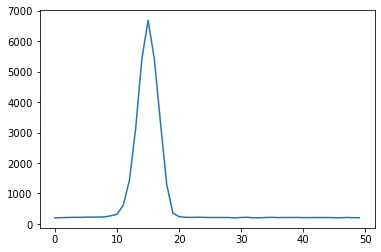

In [3]:
d1 = data_order_104[:,10]
print(d1.shape)
plt.plot(d1)

Now, what can we do is to look for maximum in this cross-section; the position of this maximum will give us the position of the 'order' in the pixel space. We take many such arbitrarily defined x-pixels using ``np.arange(50, 4000, 30)``, and find the position of maximum for each of these points. Below we plot that as well.

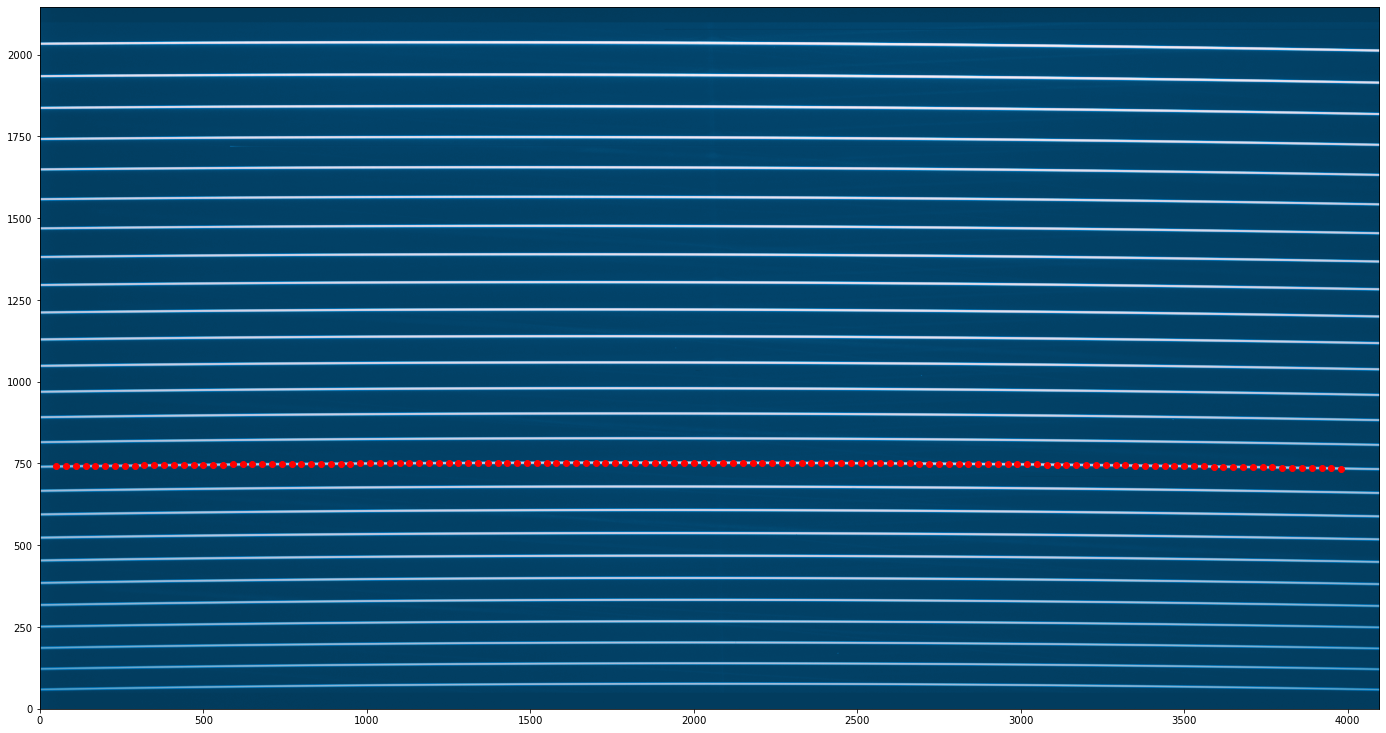

In [4]:
points = np.arange(50, 4000, 30)
maximum = np.array([])
for i in range(len(points)):
    d11 = data_order_104[:,points[i]]
    maxi = np.max(d11)
    bb = np.where(d11 == maxi)
    maximum = np.hstack((maximum, bb[0]))

#print(maximum)

plt.figure(figsize=(16*1.5,9*1.5))
plt.imshow(h22, origin='lower', norm=clr.LogNorm(),cmap='PuBu_r')
plt.scatter(points, maximum+725, color='red')

Now, we want to fit a quadratic polynomial to this data points. We fit this polynomial to data-points using `scipy.optimize.curve_fit` function. Below we print the coefficients of the fitted polynomial, which we want to use later.

In [5]:
popt, pcov = cft(utl.cubic, points, maximum)
print(popt)

[ 1.49453189e+01  1.33410596e-02 -3.52806113e-06 -4.42031001e-11]


And voila.. we have it. We traced the position of order with a quadratic polynomial. But remember that, this we did in a chunk of data rows 725:775. So, to trace the order in a full CCD, we want to add 725 to the final result.

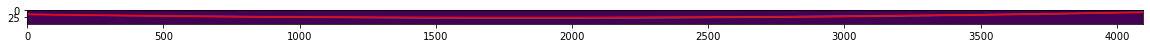

In [6]:
xx1 = np.arange(len(data_order_104[0]))
yy1 = utl.cubic(xx1, *popt)

plt.figure(figsize=(20,10))
plt.imshow(data_order_104)
plt.plot(xx1, yy1, color='red')
plt.savefig('11.png')

Below, in red, we plotted our detected trace for 104th order in the whole image.

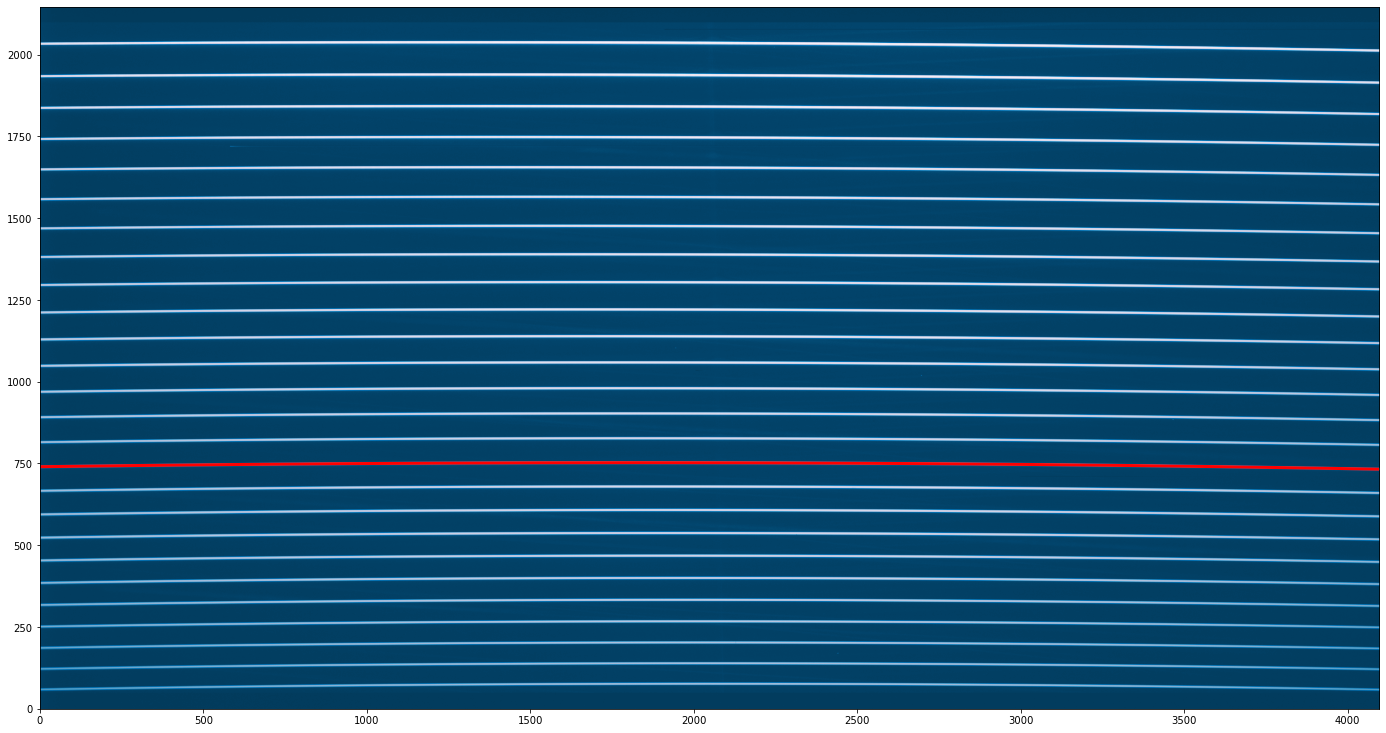

In [7]:
plt.figure(figsize=(16*1.5,9*1.5))
plt.imshow(h22, origin='lower', norm=clr.LogNorm(),cmap='PuBu_r')

ydata = utl.cubic_104(xx1, *popt)#yy1 + 725

plt.plot(xx1, ydata, c='red', lw=3)
plt.show()